José Manuel Ramírez Araiza. 09/11/23

# Actividad - Ecuaciones diferenciales

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [12]:
solve_ivp?

In [14]:
from scipy.integrate import solve_ivp, odeint
import numpy as np
import numpy as np
def f(t, x):
    return x/(t + 1) # PEMDAS
t_span = [0, 20]
x0 = np.array([.5])
x = solve_ivp(f,t_span, x0)
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01  1.100e+00  1.110e+01  2.000e+01]
        y: [[ 5.000e-01  5.500e-01  1.050e+00  6.052e+00  1.050e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 26
     njev: 0
      nlu: 0

Grafique con condición inicial $x_0 = 2$

In [19]:

x0 = np.array([2])
x = solve_ivp(f,t_span, x0)
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01  1.100e+00  1.110e+01  2.000e+01]
        y: [[ 2.000e+00  2.200e+00  4.200e+00  2.420e+01  4.200e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 26
     njev: 0
      nlu: 0

In [16]:
x.t

array([ 0.        ,  0.10001   ,  1.10010998, 11.10110978, 20.        ])

In [17]:
x.y

array([[ 2.        ,  2.20002   ,  4.20021996, 24.20221956, 42.        ]])

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

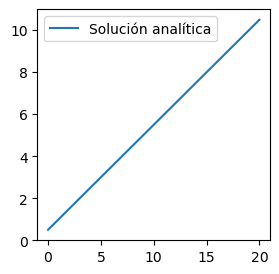

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(3, 3))
plt.plot(x.t, x.y[0,:], label = "Solución analítica")
plt.legend(loc="best")
plt.grid


2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [71]:
def funcion(t, X):
    x = X[0]
    dx = X[1]
    
    d2x = -w0**2*x
    return [dx, d2x ]
t_span = [0,20]
w0=3
x0 = np.array([0.5, 0.1])


In [72]:
g = solve_ivp(funcion,t_span, x0)
g


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.155e-02 ...  1.989e+01  2.000e+01]
        y: [[ 5.000e-01  5.009e-01 ... -4.999e-01 -4.838e-01]
            [ 1.000e-01 -4.222e-02 ... -8.901e-02  3.879e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 386
     njev: 0
      nlu: 0

Grafique

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

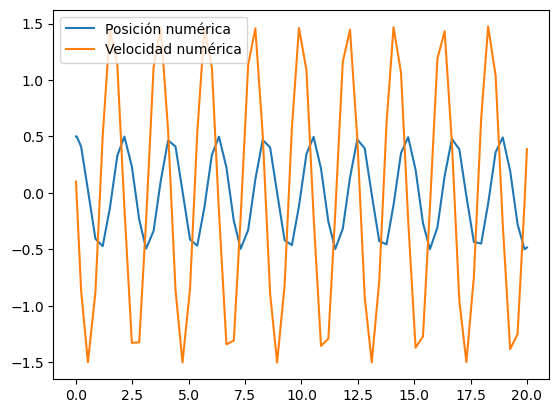

In [68]:
plt.figure()
plt.plot(g.t, g.y[0,:], label = "Posición numérica")
plt.plot(g.t, g.y[1,:], label = "Velocidad numérica")
plt.legend(loc="best")
plt.grid


Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [65]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def posicion (t,w0, x0, v0):
    A = x0
    B = v0/w0
    return A*np.cos(w0*t)+B*np.sin(w0*t)


def velocidad (t,w0, x0, v0):
    A = x0
    B = v0/w0
    return w0*(-A*np.sin(w0*t)+B*np.cos(w0*t))
    
    

w0 = 3
x0=0
v0 = 1
t = np.linspace(0,10,1000)
theta = posicion(t, w0, x0, v0)
v = velocidad(t, w0, x0, v0)

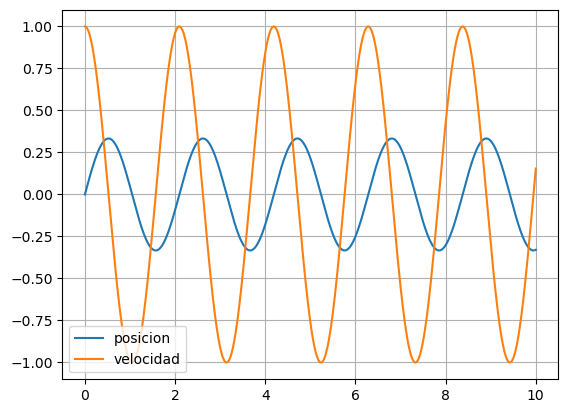

In [66]:

plt.figure()
plt.plot(t, theta,label="posicion")
plt.plot(t,v,label="velocidad")
plt.legend(loc="best")
plt.grid()

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [74]:
def graf(t, x0, w0, g):
    plt.figure()
    plt.plot(g.t, g.y[0,:], label = "Posición numérica")
    plt.plot(g.t, g.y[1,:], label = "Velocidad numérica")
    plt.plot(t, theta,label="posicion analítica")
    plt.plot(t,v,label="velocidad analítica")
    plt.legend(loc="best")
    plt.grid